In [1]:
import numpy as np
import random
from sklearn.datasets import make_regression 
import pylab
from scipy import stats

In [5]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

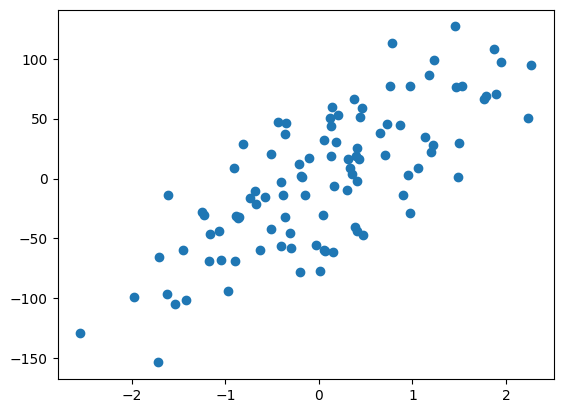

In [6]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [7]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [8]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [9]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [10]:
# шаг алгоритма
alpha = 0.01

In [11]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.]
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [12]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148
iter 27 | J: 1222.418
iter 28 | J: 1211.904
iter 29 | J: 1201.602
iter 30 | J: 1191.507
iter 31 | J: 1181.617
iter 32 | J: 1171.926
iter 33 | J: 1162.430
iter 34 | J: 1153.126
iter 35 | J: 1144.009
iter 36 | J: 1135.076
iter 37 | J: 1126.323
iter 38 | J: 1117.747
iter 39 | J: 1109.343
iter 40 | J: 1101.109
iter 41 | J: 1093.041
iter 42 | J: 1085.135
iter 43 | J: 1077.389
iter 44 | J: 1069.799
iter 45 | J: 1062.36

In [13]:
theta

array([-2.84837957, 43.20234847])

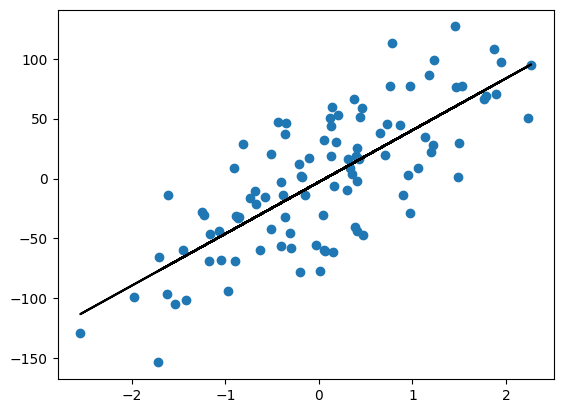

In [14]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

### Используем готовые методы

In [15]:
from sklearn import linear_model

In [16]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [17]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [18]:
%%time 

model.fit( x, y )

CPU times: total: 0 ns
Wall time: 3 ms


SGDRegressor(alpha=0.01)

In [19]:
model.intercept_, model.coef_

(array([-2.84088207]), array([42.66665365]))

In [20]:
y_predict_sgd = model.predict( x )

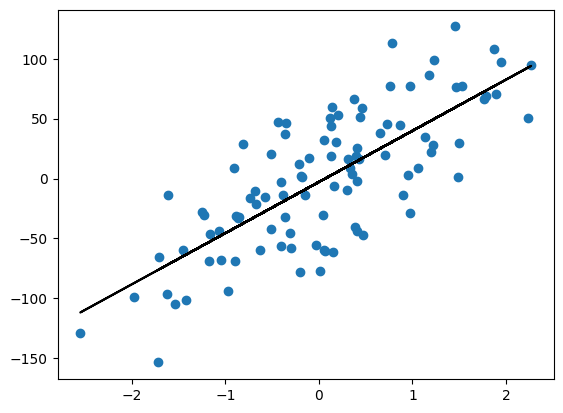

In [21]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()